In [3]:
import pandas as pd
import sklearn 
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn import feature_selection
import seaborn as sns

In [4]:
#Fundo a ser analisado
nome_do_fundo = 'paiva'
coldata = "data"
nome_benchmark = "ibov"

In [5]:
df=pd.read_csv('P:\\ciencia_de_dados\\Correlacao_de_fundos\\Desenvolvimento\\1DataPrep\\base_'+ nome_do_fundo + '.csv',sep =';',decimal=',',index_col=0)

In [8]:
df_fundo = df.loc[df.Product == nome_do_fundo,[coldata,'Retorno']]
df_bench = df.loc[df.Product == nome_benchmark,[coldata,'Retorno']]

df_fundo.index=df_fundo[coldata]
df_bench.index=df_bench[coldata]

In [9]:
df_join =pd.merge(df_bench, df_fundo,how='inner',left_index=True, right_index=True).dropna()[['Retorno_x','Retorno_y']]

In [10]:
df_join

,Retorno_x,Retorno_y
data,,
2021-08-11,-1.110389,-0.295456
2021-08-10,-0.119637,-0.407899
2021-08-09,-0.664042,-0.564416
2021-08-06,0.170181,0.276809
2021-08-05,0.968077,0.437754
...,...,...
2015-01-06,3.045776,0.804913
2015-01-05,1.018798,0.329946
2015-01-02,-2.051855,-1.035315


Regressao Linear 

In [11]:
#Regressao Linear total
x = (df_join['Retorno_x']-1).values.reshape((-1, 1))
y= (df_join['Retorno_y']-1).values.reshape((-1, 1))
regr = sklearn.linear_model.LinearRegression()
regr.fit(x, y)

LinearRegression()

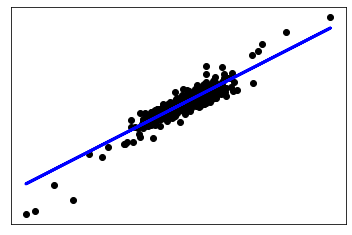

In [12]:
# plot it as in the example at http://scikit-learn.org/
plt.scatter(x, y,  color='black')
plt.plot(x, regr.predict(x), color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

In [13]:
# The coefficients
print('Beta: \n', regr.coef_)
print('Alpha: \n',regr.intercept_)
#Score R^2
print('R^2: \n',regr.score(x, y))
# The mean squared error
print('Mean squared error: %.8f' % sklearn.metrics.mean_squared_error(x, regr.predict(x)))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.8f' % sklearn.metrics.r2_score(x, regr.predict(x)))

Beta: 
 [[0.76123683]]
Alpha: 
 [-0.21615178]
R^2: 
 0.8354722140280378
Mean squared error: 0.15105310
Coefficient of determination: 0.94297244


Regressao Linear Up /Down Capture  file:///P:/ciencia_de_dados/Correlacao_de_fundos/Relatorios/SSRN-id3024136.pdf

In [15]:
#Seleciona os bpontos onde o benchmark eh positivo
df_join_up_capture = df_join[df_join['Retorno_x'] > 1]
#df_join_up_capture.index.strftime('%Y').unique()
df_join_up_capture["Retorno_x"] = df_join_up_capture["Retorno_x"] + 1
df_join_up_capture["Retorno_y"] = df_join_up_capture["Retorno_y"] + 1

retorno_anualizado_up = (df_join_up_capture["Retorno_y"].product()**(252/float(df_join_up_capture['Retorno_y'].count())) - 1) * 100
retorno_anualizado_up_bench = (df_join_up_capture["Retorno_x"].product()**(252/float(df_join_up_capture['Retorno_x'].count())) - 1) * 100

upside_capture_radio = ((retorno_anualizado_up-1)/(retorno_anualizado_up_bench-1))
upside_capture_radio

C:\Users\carol\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\carol\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


3.167136503930928e-30

In [16]:
#Seleciona os bpontos onde o benchmark eh positivo
df_join_down_capture = df_join[df_join['Retorno_x'] <= 1]


df_join_down_capture
n_down = float(df_join_down_capture['Retorno_y'].count())

retorno_medio_total_fundo = ((df_join_down_capture['Retorno_y']).product()) ** (1/n_down)
retorno_medio_total_bench = ((df_join_down_capture['Retorno_x']).product()) ** (1/n_down)

upside_capture_radio = (retorno_medio_total_fundo - 1 )/(retorno_medio_total_bench - 1)*100
upside_capture_radio

100.0

Mutual Information para variavel continua
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_regression.html

In [17]:
#Multual Information(Entropia)
sklearn.feature_selection.mutual_info_regression(x,df_join['Retorno_y']-1)

array([1.00034907])

Correlacao de Pearson

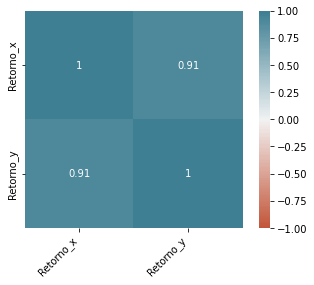

In [18]:
corr = df_join.corr()
ax = sns.heatmap(
    corr,
    annot=True, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);